<a href="https://colab.research.google.com/github/Kalisa21/Smart_mobility/blob/main/Traffic_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Models with Optimization Techniques
    
This notebook explores the implementation of various machine learning models with optimization techniques such as
regularization, optimization, and error analysis. The goal is to improve model performance, convergence speed, and efficiency.
    
## Models Implemented:
1. **Neural Network with RMSprop and L2 Regularization**
2. **Neural Network with Adam and L1 Regularization**
3. **Neural Network with SGD and Overfitting Prevention**
4. **Logistic Regression with Hyperparameter Tuning**
5. **Basic Neural Network (No Optimization)**


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/Traffic.csv"
df = pd.read_csv(file_path)

# Encode categorical target variable
label_encoder = LabelEncoder()
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

# Drop non-numeric and redundant columns
df = df.drop(columns=['Time', 'Date', 'Day of the week'])

# Separate features and target
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(y_test, y_pred_classes, title="Confusion Matrix"):
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5609 - loss: 3.1713 - val_accuracy: 0.7517 - val_loss: 1.8909
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 1.7199 - val_accuracy: 0.7634 - val_loss: 1.1334
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 1.0968 - val_accuracy: 0.7685 - val_loss: 0.8390
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7675 - loss: 0.8431 - val_accuracy: 0.7802 - val_loss: 0.7378
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7824 - loss: 0.7436 - val_accuracy: 0.7752 - val_loss: 0.6875
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.7040 - val_accuracy: 0.7852 - val_loss: 0.6527
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7992 - loss: 0.6733 - val_accuracy: 0.8037 - val_loss: 0.6276
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8009 - loss: 0.6614 - val_accuracy: 0.8205 - val_loss: 0.6074
Epo

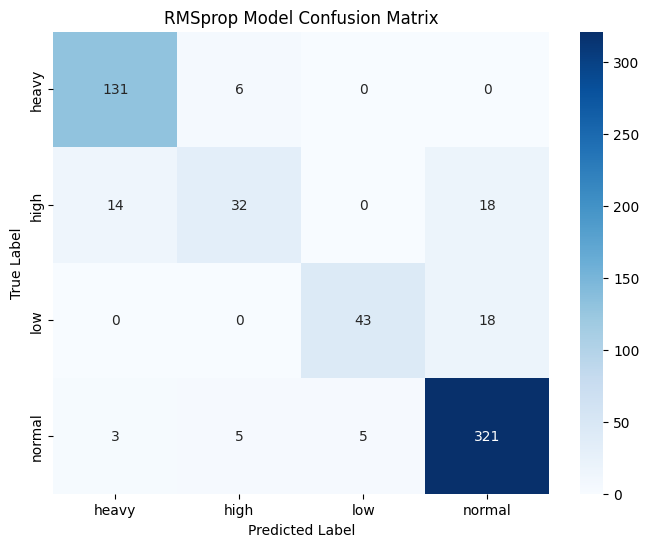

In [2]:
# Neural Network with RMSprop and L2 Regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.05), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="RMSprop Model Confusion Matrix")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5906 - loss: 3.8547 - val_accuracy: 0.7450 - val_loss: 2.6703
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7349 - loss: 2.4523 - val_accuracy: 0.7634 - val_loss: 1.7308
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7495 - loss: 1.6327 - val_accuracy: 0.7735 - val_loss: 1.2092
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 1.2039 - val_accuracy: 0.7802 - val_loss: 0.9975
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7460 - loss: 1.0356 - val_accuracy: 0.7802 - val_loss: 0.9029
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7705 - loss: 0.9245 - val_accuracy: 0.7852 - val_loss: 0.8379
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7693 - loss: 0.8799 - val_accuracy: 0.7953 - val_loss: 0.7911
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7867 - loss: 0.8302 - val_accuracy: 0.7970 - val_loss: 0.7508
Ep

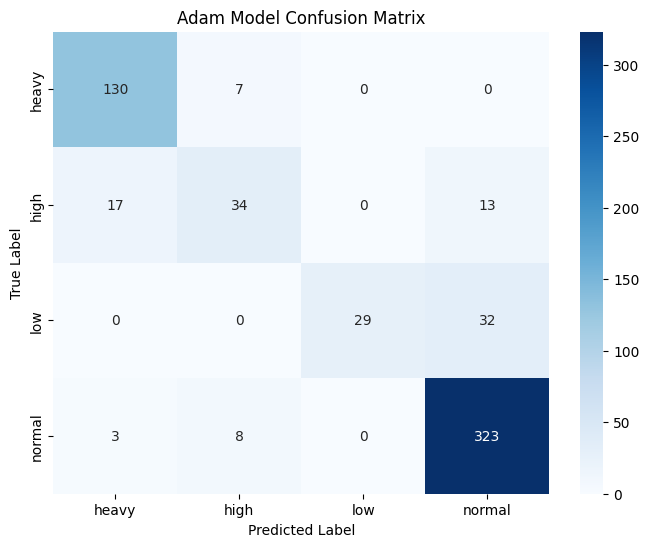

In [3]:
# Neural Network with Adam and L1 Regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="Adam Model Confusion Matrix")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6304 - loss: 1.3720 - val_accuracy: 0.8440 - val_loss: 0.7395
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8381 - loss: 0.7193 - val_accuracy: 0.8792 - val_loss: 0.5685
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8533 - loss: 0.5831 - val_accuracy: 0.8859 - val_loss: 0.4933
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8820 - loss: 0.4868 - val_accuracy: 0.9010 - val_loss: 0.4318
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8793 - loss: 0.4606 - val_accuracy: 0.8993 - val_loss: 0.4073
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8749 - loss: 0.4415 - val_accuracy: 0.9044 - val_loss: 0.3904
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8940 - loss: 0.3969 - val_accuracy: 0.8977 - val_loss: 0.3855
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8799 - loss: 0.4240 - val_accuracy: 0.8993

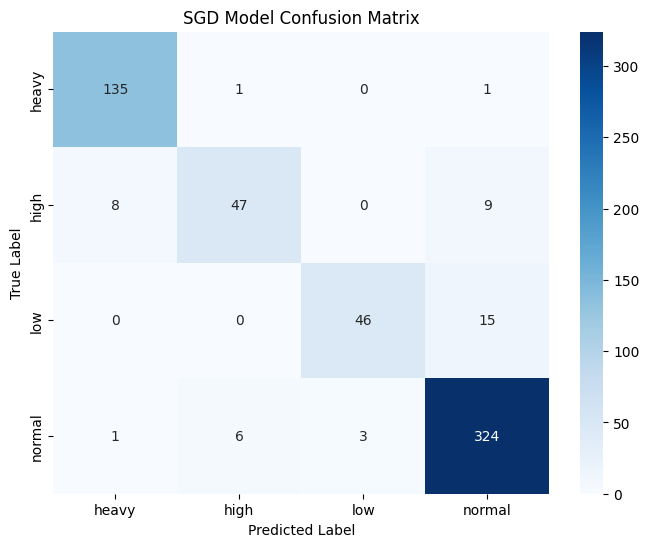

In [4]:
# Neural Network with SGD
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, callbacks=[early_stopping], verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="SGD Model Confusion Matrix")


Accuracy: 0.8003
Precision: 0.7797
Recall: 0.8003
F1 Score: 0.7614


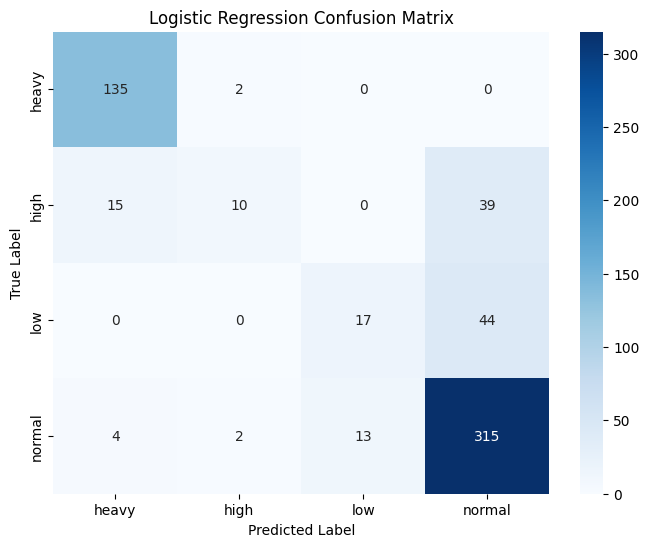

In [5]:
# Logistic Regression with Hyperparameter Tuning
log_reg = LogisticRegression(max_iter=200, solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
evaluate_model(y_test, y_pred, title="Logistic Regression Confusion Matrix")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5230 - loss: 1.1171 - val_accuracy: 0.7701 - val_loss: 0.5982
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8159 - loss: 0.5422 - val_accuracy: 0.8624 - val_loss: 0.3920
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8917 - loss: 0.3561 - val_accuracy: 0.9128 - val_loss: 0.2949
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9304 - loss: 0.2765 - val_accuracy: 0.9161 - val_loss: 0.2588
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9328 - loss: 0.2357 - val_accuracy: 0.9195 - val_loss: 0.2273
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9429 - loss: 0.2059 - val_accuracy: 0.9312 - val_loss: 0.2215
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9502 - loss: 0.1937 - val_accuracy: 0.9262 - val_loss: 0.2001
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9486 - loss: 0.1751 - val_accuracy: 0.9295 - val_loss: 0.1905
Epo

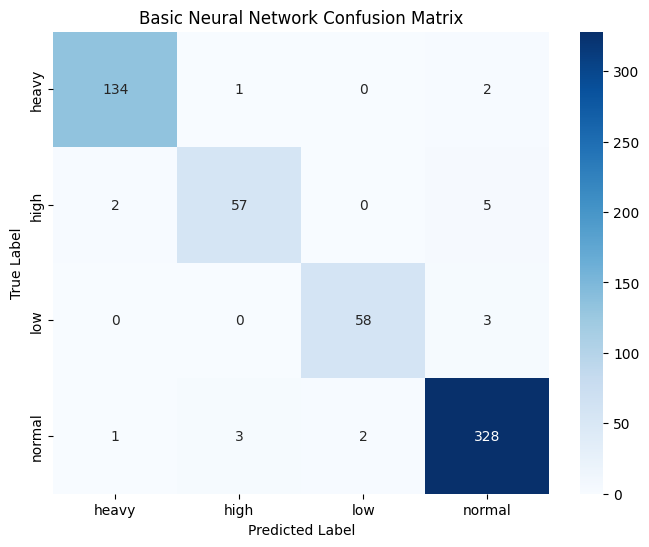

In [6]:
# Basic Neural Network Without Optimization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="Basic Neural Network Confusion Matrix")
